This notebook runs through everything really quickly, can either use sklearn models or keras. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import sklearn.manifold
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import sklearn

In [ ]:
sklearn.utils.

In [9]:
windows = [5,10,15,50]

Lookback period:  5


/Users/noahkasmanoff/NBAForecasting/2k19_Forecast/create_dataset.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  team_season['Rolling ' + col] = team_season[col].rolling(window=N_GAMES).mean().shift(1)
/Users/noahkasmanoff/NBAForecasting/2k19_Forecast/create_dataset.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  road_df['road_' + col] = road_df[col]
/Users/noahkasmanoff/NBAForecasting/2k19_Forecast/create_dataset.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Baseline MLP train Score  0.685753867467
Baseline MLP test Score  0.67728531856
Lookback period:  10
Baseline MLP train Score  0.684444444444
Baseline MLP test Score  0.674814814815
Lookback period:  15
Baseline MLP train Score  0.67940552017
Baseline MLP test Score  0.683373110581
Lookback period:  50
Baseline MLP train Score  0.681666666667
Baseline MLP test Score  0.688333333333


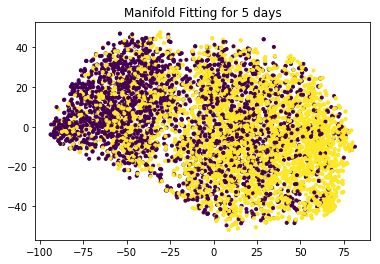

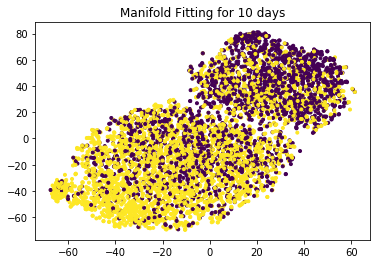

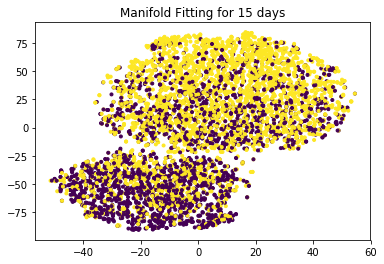

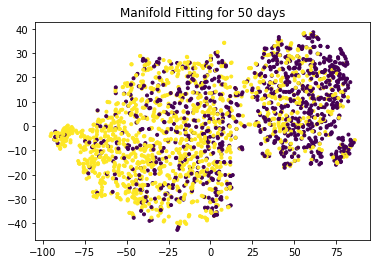

In [10]:
for WINDOW in windows:
    print("Lookback period: ", WINDOW, )
    X , y = create_rolling_dataset(window=WINDOW,FILENAME='NBADATA.csv',winner=True)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 12)
    scaler  = MinMaxScaler()

    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model = MLPClassifier()
    model.fit(X_train,y_train)

    print("Baseline MLP train Score ", model.score(X_train,y_train))

    print("Baseline MLP test Score ", model.score(X_test,y_test))
    tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X.values)
    X_tsne_x = X_tsne[:,0]
    X_tsne_y = X_tsne[:,1]
    plt.figure()
    plt.title("Manifold Fitting for " + str(WINDOW) + " days")
    plt.scatter(X_tsne_x,X_tsne_y,c=y,marker='.')

In [14]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_tsne,y)
knn.score(X_tsne,y)

0.76000000000000001

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 12)
scaler  = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train,y_train)

print("Train Score ", model.score(X_train,y_train))

print("Test Score ", model.score(X_test,y_test))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(60, input_dim=X_train.shape[1], activation='relu'))
#note softmax is used for classification problems as the final entry before the output. 
model.add(Dense(60, activation='relu'))

model.add(Dense(60, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#need to use a large number of epochs for this set, still end up with non overfit data based on the validation reisutls plus model evaluation. 
model.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.2,verbose=1)




In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
sum(y)

In [ ]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)


In [ ]:
plt.plot(X_tsne)

In [ ]:
import seaborn as sns
sns.set_context("poster")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(X_tsne_x,X_tsne_y,'.')

In [ ]:
X_tsne[0:3]

In [ ]:
X_tsne[:,1]

In [ ]:
X_tsne_x = X_tsne[:,0]
X_tsne_y = X_tsne[:,1]

In [ ]:
plt.scatter(X_tsne_x,X_tsne_y,c=y,marker='.')

So the blob separation is what happens for a home or road team victory, which means it is something that can accurately be modelled. 

In [18]:
from sklearn.decomposition import PCA, NMF


In [32]:
principal_features = 3
pca = PCA(n_components = principal_features)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)  #turns it into a two feature dataset. 
X_test_pca = pca.transform(X_test)

In [ ]:
plt.title("PCA " + str(WINDOW) + " days")
plt.scatter(X_tsne_x,X_tsne_y,c=y,marker='.')

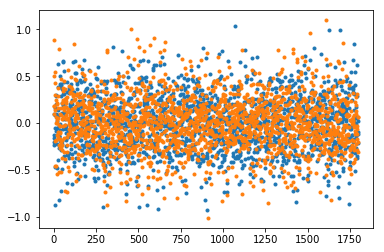

In [23]:
plt.plot(X_train_pca,'.')

In [24]:
X_train_PCA_x = X_train_pca[:,0]
X_train_PCA_y = X_train_pca[:,1]

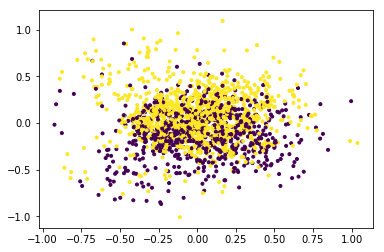

In [28]:
plt.scatter(X_train_PCA_x,X_train_PCA_y,c=y_train,marker='.')

In [33]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
knn.score(X_train_pca,y_train)

0.74888888888888894

In [34]:
knn.score(X_test_pca,y_test)

0.63166666666666671